# Timeseries

In [ ]:
from tensorflow.keras.utils import timeseries_dataset_from_array
import numpy as np

In [ ]:
int_sequence = np.arange(10)
int_sequence

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
sequence_length = 3
delay = 0

small_dataset = timeseries_dataset_from_array(data = int_sequence,
                                              targets = int_sequence[sequence_length + delay:],
                                              sequence_length = sequence_length,
                                              batch_size = 1)

for data, targets in small_dataset:
    print(data.numpy(), targets.numpy())

[[0 1 2]] [3]
[[1 2 3]] [4]
[[2 3 4]] [5]
[[3 4 5]] [6]
[[4 5 6]] [7]
[[5 6 7]] [8]
[[6 7 8]] [9]


In [ ]:
pressure = np.round( (1000. - 900.) * np.random.random_sample(size=(10,)) + 900., 2)
pressure = pressure.reshape(-1, 1)
pressure

array([[987.37],
       [912.93],
       [979.74],
       [987.32],
       [987.53],
       [910.23],
       [936.84],
       [930.14],
       [991.78],
       [934.32]])

In [ ]:
temperature = np.round( (35. - 21.) * np.random.random_sample(size=(10,)) + 21., 1)
temperature = temperature.reshape(-1, 1)
temperature

array([[31.5],
       [26.8],
       [30.9],
       [31.4],
       [25.8],
       [31.6],
       [28.2],
       [26.3],
       [30.4],
       [32.4]])

In [ ]:
temp_data = np.concatenate([temperature, pressure], axis=1)
temp_data

array([[ 31.5 , 987.37],
       [ 26.8 , 912.93],
       [ 30.9 , 979.74],
       [ 31.4 , 987.32],
       [ 25.8 , 987.53],
       [ 31.6 , 910.23],
       [ 28.2 , 936.84],
       [ 26.3 , 930.14],
       [ 30.4 , 991.78],
       [ 32.4 , 934.32]])

In [ ]:
sequence_length = 3
delay = 0

# TO DO:
temp_dataset = timeseries_dataset_from_array(data = temp_data,
                                             targets = temperature[sequence_length + delay:],
                                             sequence_length = sequence_length,
                                             batch_size = 1)



In [ ]:
for data, targets in temp_dataset:
    print(data.numpy(), targets.numpy())

[[[ 31.5  987.37]
  [ 26.8  912.93]
  [ 30.9  979.74]]] [[31.4]]
[[[ 26.8  912.93]
  [ 30.9  979.74]
  [ 31.4  987.32]]] [[25.8]]
[[[ 30.9  979.74]
  [ 31.4  987.32]
  [ 25.8  987.53]]] [[31.6]]
[[[ 31.4  987.32]
  [ 25.8  987.53]
  [ 31.6  910.23]]] [[28.2]]
[[[ 25.8  987.53]
  [ 31.6  910.23]
  [ 28.2  936.84]]] [[26.3]]
[[[ 31.6  910.23]
  [ 28.2  936.84]
  [ 26.3  930.14]]] [[30.4]]
[[[ 28.2  936.84]
  [ 26.3  930.14]
  [ 30.4  991.78]]] [[32.4]]


In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np

path = Path().cwd()

fname = path / "jena_climate_2009_2016.csv"

data_df = pd.read_csv(fname)
data_df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [ ]:
features = list(data_df.columns)
str(features)

"['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)']"

In [ ]:
data_df[features[0]].head(10)

0    01.01.2009 00:10:00
1    01.01.2009 00:20:00
2    01.01.2009 00:30:00
3    01.01.2009 00:40:00
4    01.01.2009 00:50:00
5    01.01.2009 01:00:00
6    01.01.2009 01:10:00
7    01.01.2009 01:20:00
8    01.01.2009 01:30:00
9    01.01.2009 01:40:00
Name: Date Time, dtype: object

In [ ]:
data_df[features[0]].tail(10)

420441    31.12.2016 22:30:00
420442    31.12.2016 22:40:00
420443    31.12.2016 22:50:00
420444    31.12.2016 23:00:00
420445    31.12.2016 23:10:00
420446    31.12.2016 23:20:00
420447    31.12.2016 23:30:00
420448    31.12.2016 23:40:00
420449    31.12.2016 23:50:00
420450    01.01.2017 00:00:00
Name: Date Time, dtype: object

In [ ]:
temp_df = data_df[features[2]]
temp_df.head()

0   -8.02
1   -8.41
2   -8.51
3   -8.31
4   -8.27
Name: T (degC), dtype: float64

In [ ]:
temp_df.tail()

420446   -4.05
420447   -3.35
420448   -3.16
420449   -4.23
420450   -4.82
Name: T (degC), dtype: float64

In [ ]:
raw_data_df = data_df.drop(columns=[features[0]])
orig_data = raw_data_df.copy()
raw_data_df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [ ]:
raw_data_df.shape

(420451, 14)

In [ ]:
temp_df.shape

(420451,)

In [ ]:
raw_data_np = raw_data_df.values
temp_np = temp_df.values

In [ ]:
raw_data_np[:5]

array([[ 9.96520e+02, -8.02000e+00,  2.65400e+02, -8.90000e+00,
         9.33000e+01,  3.33000e+00,  3.11000e+00,  2.20000e-01,
         1.94000e+00,  3.12000e+00,  1.30775e+03,  1.03000e+00,
         1.75000e+00,  1.52300e+02],
       [ 9.96570e+02, -8.41000e+00,  2.65010e+02, -9.28000e+00,
         9.34000e+01,  3.23000e+00,  3.02000e+00,  2.10000e-01,
         1.89000e+00,  3.03000e+00,  1.30980e+03,  7.20000e-01,
         1.50000e+00,  1.36100e+02],
       [ 9.96530e+02, -8.51000e+00,  2.64910e+02, -9.31000e+00,
         9.39000e+01,  3.21000e+00,  3.01000e+00,  2.00000e-01,
         1.88000e+00,  3.02000e+00,  1.31024e+03,  1.90000e-01,
         6.30000e-01,  1.71600e+02],
       [ 9.96510e+02, -8.31000e+00,  2.65120e+02, -9.07000e+00,
         9.42000e+01,  3.26000e+00,  3.07000e+00,  1.90000e-01,
         1.92000e+00,  3.08000e+00,  1.30919e+03,  3.40000e-01,
         5.00000e-01,  1.98000e+02],
       [ 9.96510e+02, -8.27000e+00,  2.65150e+02, -9.04000e+00,
         9.41000e+01

In [ ]:
temp_np[:5]

array([-8.02, -8.41, -8.51, -8.31, -8.27])

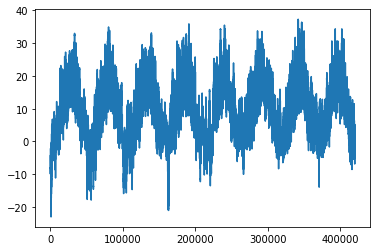

In [ ]:
from matplotlib import pyplot as plt

plt.plot(range(len(temp_np)), temp_np)

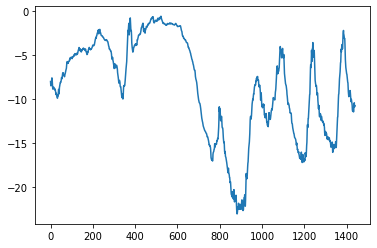

In [ ]:
plt.plot(range(1440), temp_np[:1440])

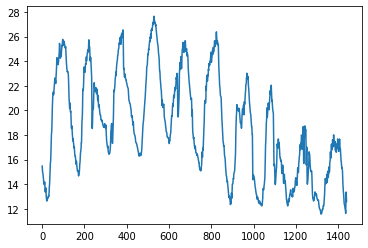

In [ ]:
plt.plot(range(1440), temp_np[25920:25920+1440])

In [ ]:
raw_data_df.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,420451.000000,420451.000000,420451.000000,420451.000000,420451.000000,420451.000000,420451.000000,420451.000000,420451.000000,420451.000000,420451.000000,420451.000000,420451.000000,420451.000000
mean,989.212508,9.448567,283.491182,4.954011,76.007045,13.575089,9.532524,4.042483,6.021630,9.638982,1216.069883,2.130309,3.532381,174.726164
std,8.359454,8.423685,8.504820,6.730411,16.477126,7.739481,4.183895,4.897270,2.655973,4.235130,39.977065,1.541830,2.340482,86.675965
min,913.600000,-23.010000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,1059.450000,0.000000,0.000000,0.000000
25%,984.200000,3.360000,277.430000,0.240000,65.210000,7.780000,6.210000,0.870000,3.920000,6.290000,1187.490000,0.990000,1.760000,124.800000
50%,989.570000,9.410000,283.460000,5.210000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.800000,1.760000,2.960000,198.100000
75%,994.720000,15.470000,289.530000,10.070000,89.400000,17.600000,12.350000,5.300000,7.800000,12.480000,1242.770000,2.860000,4.740000,234.100000
max,1015.350000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,1393.540000,14.630000,23.500000,360.000000


In [ ]:
420451/2+420451/4

315338.25

In [ ]:
# TO DO: split data into 50% train, 25% val, 25% test
num_train_samples = 210225
num_val_samples = 105113
num_test_samples = 105113

In [ ]:
# TO DO: print out train, val, and test sizes
print(num_train_samples)
print(num_val_samples)
print(num_test_samples)

210225
105113
105113


In [ ]:
mean = np.mean(raw_data_np[:num_train_samples], axis=0)
std = np.std(raw_data_np[:num_train_samples], axis=0)

temp_mean = mean[1]
temp_std = std[1]

raw_data_np -= mean
raw_data_np /= std

In [ ]:
raw_data_np[:5]

array([[ 0.91365151, -1.92064015, -1.97449272, -1.86625827,  1.04801712,
        -1.29131928, -1.46715535, -0.78234525, -1.47012583, -1.4720352 ,
         2.12415558, -0.73016651, -0.77935289, -0.28119316],
       [ 0.91953033, -1.96510495, -2.01848295, -1.91992974,  1.05403079,
        -1.30447494, -1.48885833, -0.78444185, -1.48911721, -1.49346536,
         2.1729195 , -0.93230685, -0.88696976, -0.46989368],
       [ 0.91482727, -1.97650618, -2.0297625 , -1.92416696,  1.08409914,
        -1.30710607, -1.49126977, -0.78653846, -1.49291549, -1.49584649,
         2.18338591, -1.27790162, -1.26147647, -0.05638329],
       [ 0.91247574, -1.95370372, -2.00607545, -1.89026919,  1.10214015,
        -1.30052824, -1.47680112, -0.78863507, -1.47772238, -1.48155971,
         2.15840926, -1.18009178, -1.31743724,  0.25112867],
       [ 0.91247574, -1.94914323, -2.00269159, -1.88603197,  1.09612648,
        -1.29921268, -1.47438968, -0.78863507, -1.47772238, -1.47917858,
         2.15388968, -1.19

In [ ]:
np.mean(raw_data_np[:num_train_samples], axis=0)

array([-1.51420214e-17, -8.65258368e-18, -4.32629184e-18,  2.59577510e-17,
        0.00000000e+00, -3.24471888e-17, -1.29788755e-17, -4.32629184e-17,
       -4.32629184e-18, -5.84049398e-17,  2.81208970e-17,  1.18973026e-17,
        1.66967826e-17,  1.48716282e-17])

In [ ]:
np.std(raw_data_np[:num_train_samples], axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
sampling_rate = 6
sequence_length = 120 # 5 days * 24 hours per day
delay = sampling_rate * (sequence_length + 24 -1 ) # -1 because of 0 indexing
batch_size = 256

In [ ]:
# TO DO: fill in missing information

train_ds = timeseries_dataset_from_array(
                data=raw_data_np[:-delay],
                targets = temp_np[delay:],
                sampling_rate=sampling_rate,
                sequence_length=sequence_length,
                shuffle=True,
                batch_size=256,
                start_index=0,
                end_index=num_train_samples)

val_ds = timeseries_dataset_from_array(
                data=raw_data_np[:-delay],
                targets = temp_np[delay:],
                sampling_rate=sampling_rate,
                sequence_length=sequence_length,
                shuffle=True,
                batch_size=256,
                start_index=num_train_samples,
                end_index=num_train_samples+num_val_samples)

test_ds = timeseries_dataset_from_array(
                data=raw_data_np[:-delay],
                targets = temp_np[delay:],
                sampling_rate=sampling_rate,
                sequence_length=sequence_length,
                shuffle=True,
                batch_size=256,
                start_index=num_train_samples+num_val_samples)

In [ ]:

for input, targets in val_ds:
    print(input.numpy().shape, targets.numpy().shape)
    break

(256, 120, 14) (256,)


In [ ]:
raw_data_df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,0.913652,-1.920640,-1.974493,-1.866258,1.048017,-1.291319,-1.467155,-0.782345,-1.470126,-1.472035,2.124156,-0.730167,-0.779353,-0.281193
1,0.919530,-1.965105,-2.018483,-1.919930,1.054031,-1.304475,-1.488858,-0.784442,-1.489117,-1.493465,2.172920,-0.932307,-0.886970,-0.469894
2,0.914827,-1.976506,-2.029762,-1.924167,1.084099,-1.307106,-1.491270,-0.786538,-1.492915,-1.495846,2.183386,-1.277902,-1.261476,-0.056383
3,0.912476,-1.953704,-2.006075,-1.890269,1.102140,-1.300528,-1.476801,-0.788635,-1.477722,-1.481560,2.158409,-1.180092,-1.317437,0.251129
4,0.912476,-1.949143,-2.002692,-1.886032,1.096126,-1.299213,-1.474390,-0.788635,-1.477722,-1.479179,2.153890,-1.193133,-1.261476,0.440994


In [ ]:
def naive_baseline(dataset):
    total_abs_err = 0
    samples_seen = 0
    for samples, targets in dataset:
        preds = samples[:, -1, 1] * std[1] + mean[1]
        total_abs_err += np.sum(np.abs(preds - targets))
        samples_seen += samples.shape[0]
    return total_abs_err / samples_seen

In [ ]:
print(f"Validation MAE: {naive_baseline(val_ds):.2f}")
print(f"Test MAE: {naive_baseline(test_ds):.2f}")

Validation MAE: 10.33
Test MAE: 10.45


In [ ]:
# TO DO: create fully-connected network: 1 hidden layer with 16 neurons and "relu" activation

from tensorflow.keras import layers, Input, Model

inputs = Input(shape=(sequence_length,raw_data_np.shape[-1]))
x = layers.Flatten()(inputs)
x = layers.Dense(16,activation='relu')(x)
outputs = layers.Dense(1)(x)

model = Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 120, 14)]         0         
                                                                 
 flatten_2 (Flatten)         (None, 1680)              0         
                                                                 
 dense_1 (Dense)             (None, 16)                26896     
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 26,913
Trainable params: 26,913
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import keras
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["mae"])

callbacks = keras.callbacks.ModelCheckpoint("jena_fc.keras",
                                            save_best_only=True,
                                            monitor="val_loss")

history = model.fit(train_ds, epochs=10, validation_data=val_ds, callbacks=[callbacks])

Epoch 1/10
819/819 [==============================] - 50s 60ms/step - loss: 13.8178 - mae: 2.8801 - val_loss: 11.0048 - val_mae: 2.6340
Epoch 2/10
819/819 [==============================] - 50s 61ms/step - loss: 9.5939 - mae: 2.4383 - val_loss: 12.1524 - val_mae: 2.7714
Epoch 3/10
819/819 [==============================] - 54s 66ms/step - loss: 8.8514 - mae: 2.3435 - val_loss: 12.0783 - val_mae: 2.7506
Epoch 4/10
819/819 [==============================] - 49s 59ms/step - loss: 8.3141 - mae: 2.2715 - val_loss: 11.6469 - val_mae: 2.7155
Epoch 5/10
819/819 [==============================] - 49s 60ms/step - loss: 7.9762 - mae: 2.2240 - val_loss: 11.3868 - val_mae: 2.6809
Epoch 6/10
819/819 [==============================] - 54s 65ms/step - loss: 7.7170 - mae: 2.1893 - val_loss: 12.4120 - val_mae: 2.7928
Epoch 7/10
819/819 [==============================] - 49s 59ms/step - loss: 7.5076 - mae: 2.1581 - val_loss: 11.2972 - val_mae: 2.6633
Epoch 8/10
819/819 [==============================] - 

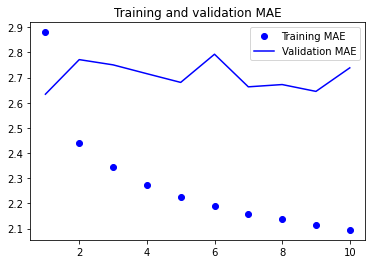

In [ ]:
import matplotlib.pyplot as plt

loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)

# plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

In [ ]:
import tensorflow

model = tensorflow.keras.models.load_model("jena_fc.keras")
print(f"Test MAE: {model.evaluate(test_ds)[1]:.2f}")

405/405 [==============================] - 16s 39ms/step - loss: 12.3281 - mae: 2.7544
Test MAE: 2.75


In [ ]:
inputs = Input(shape=(sequence_length, raw_data_np.shape[-1]))
x = layers.Conv1D(8, 24, activation="relu")(inputs)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8, 12, activation="relu")(x)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8, 6, activation="relu")(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1)(x)

model2 = Model(inputs, outputs)
model2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 120, 14)]         0         
                                                                 
 conv1d_3 (Conv1D)           (None, 97, 8)             2696      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 48, 8)            0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 37, 8)             776       
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 18, 8)            0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 13, 8)             392 

In [ ]:
callbacks = keras.callbacks.ModelCheckpoint("jena_conv.keras",
                                            save_best_only=True)

model2.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

history2 = model2.fit(train_ds,
                      epochs=10,
                      validation_data=val_ds,
                      callbacks=[callbacks])

Epoch 1/10
819/819 [==============================] - 75s 91ms/step - loss: 24.3597 - mae: 3.8186 - val_loss: 15.1480 - val_mae: 3.0652
Epoch 2/10
819/819 [==============================] - 75s 92ms/step - loss: 15.5518 - mae: 3.1371 - val_loss: 21.6055 - val_mae: 3.6885
Epoch 3/10
819/819 [==============================] - 76s 92ms/step - loss: 14.0819 - mae: 2.9806 - val_loss: 19.4970 - val_mae: 3.4811
Epoch 4/10
819/819 [==============================] - 76s 92ms/step - loss: 13.2620 - mae: 2.8893 - val_loss: 16.4983 - val_mae: 3.1889
Epoch 5/10
819/819 [==============================] - 76s 92ms/step - loss: 12.5707 - mae: 2.8100 - val_loss: 14.4460 - val_mae: 3.0019
Epoch 6/10
819/819 [==============================] - 76s 92ms/step - loss: 11.9975 - mae: 2.7440 - val_loss: 17.7746 - val_mae: 3.3258
Epoch 7/10
819/819 [==============================] - 76s 92ms/step - loss: 11.5275 - mae: 2.6860 - val_loss: 14.9684 - val_mae: 3.0308
Epoch 8/10
819/819 [============================

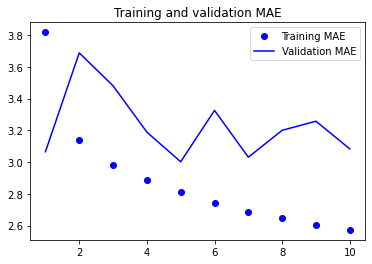

In [ ]:
loss = history2.history["mae"]
val_loss = history2.history["val_mae"]
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

In [ ]:
model = keras.models.load_model("jena_conv.keras")
print(f"Test MAE: {model.evaluate(test_ds)[1]:.2f}")

405/405 [==============================] - 19s 47ms/step - loss: 14.8425 - mae: 3.0276
Test MAE: 3.03


In [ ]:
inputs = Input(shape=(sequence_length, raw_data_np.shape[-1]))
x = layers.LSTM(16)(inputs)
outputs = layers.Dense(1)(x)

model3 = Model(inputs, outputs)
model3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 120, 14)]         0         
                                                                 
 lstm (LSTM)                 (None, 16)                1984      
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2,001
Trainable params: 2,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.compile(optimizer="rmsprop",
               loss="mse",
               metrics=["mae"])

callbacks = keras.callbacks.ModelCheckpoint("jena_lstm.keras",
                                            save_best_only=True)

history3 = model3.fit(train_ds,
                      epochs=10,
                      validation_data=val_ds,
                      callbacks=[callbacks])

Epoch 1/10
819/819 [==============================] - 96s 115ms/step - loss: 39.9935 - mae: 4.5717 - val_loss: 12.0835 - val_mae: 2.6613
Epoch 2/10
819/819 [==============================] - 93s 113ms/step - loss: 10.7500 - mae: 2.5543 - val_loss: 9.3958 - val_mae: 2.3748
Epoch 3/10
819/819 [==============================] - 94s 115ms/step - loss: 9.8693 - mae: 2.4494 - val_loss: 9.5450 - val_mae: 2.4004
Epoch 4/10
819/819 [==============================] - 94s 115ms/step - loss: 9.4929 - mae: 2.4025 - val_loss: 9.5489 - val_mae: 2.4002
Epoch 5/10
819/819 [==============================] - 94s 114ms/step - loss: 9.1196 - mae: 2.3578 - val_loss: 9.6502 - val_mae: 2.4184
Epoch 6/10
819/819 [==============================] - 94s 114ms/step - loss: 8.8271 - mae: 2.3178 - val_loss: 9.6203 - val_mae: 2.4141
Epoch 7/10
819/819 [==============================] - 94s 114ms/step - loss: 8.5945 - mae: 2.2854 - val_loss: 10.0683 - val_mae: 2.4700
Epoch 8/10
819/819 [==============================]

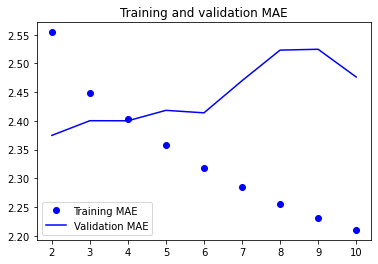

In [ ]:
loss = history3.history["mae"]
val_loss = history3.history["val_mae"]
epochs = range(1, len(loss) + 1)

plt.plot(epochs[1:], loss[1:], "bo", label="Training MAE")
plt.plot(epochs[1:], val_loss[1:], "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

In [ ]:
model = tensorflow.keras.models.load_model("jena_lstm.keras")
print(f"Test MAE: {model.evaluate(test_ds)[1]:.2f}")

405/405 [==============================] - 21s 51ms/step - loss: 10.6586 - mae: 2.5520
Test MAE: 2.55
